In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import json


sns.set_style("white", {"font": "serif"})

In [2]:
with open("lstm.json") as reader:
    lstm_data = json.load(reader)
    
with open("transformer.json") as reader:
    transformer_data = json.load(reader)
    
noises = ["symbol_swap", "symbol_mask", "symbol_dropout", "state_reset", "state_skip", "state_noise", "state_dropout"]

def fix_hyp_names(result):
    pretty_names = {
        "copycat": "Random\nRestart",
        "ngram(2)": "Lexical\nContext",
        "ngram(1)": "Unigram",
        "skip": "Ignore",
        "mean_dist_state": "Syntactic\nContext",
        "interp_add": "Interp.\n(add.)",
        "interp_mul": "Interp.\n(mul.)"
    }
    new_result = dict(**result)
    new_result["hypothesis"] = pretty_names[result["hypothesis"]]
    return new_result

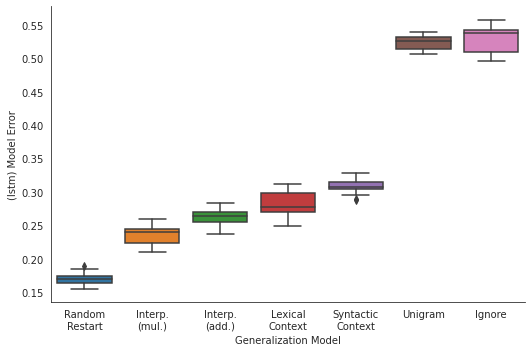

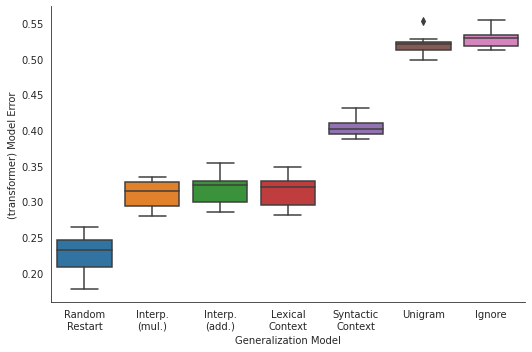

In [7]:
for model, data in [("lstm", lstm_data), ("transformer", transformer_data)]:
    noise_free = []
    for result_group in data:
        noise_type, = (n for n in noises if n in result_group[0])
        for result in result_group:
            if result["hypothesis"] == "gt":
                continue
            if result[noise_type] == 0:
                noise_free.append(fix_hyp_names(result))
    df = pd.DataFrame(noise_free)
    sns.catplot(
        data=df,
        x="hypothesis",
        y="extrap_acc",
        #hue="hypothesis",
        order=["Random\nRestart", "Interp.\n(mul.)", "Interp.\n(add.)", "Lexical\nContext", "Syntactic\nContext", "Unigram", "Ignore"],
        aspect=1.5,
        kind="box",
    )
    plt.xlabel("Generalization Model")
    plt.ylabel(f"({model}) Model Error")
    plt.savefig(f"{model}_base.pdf")

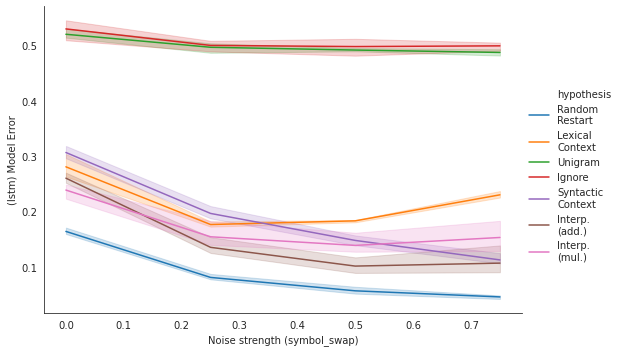

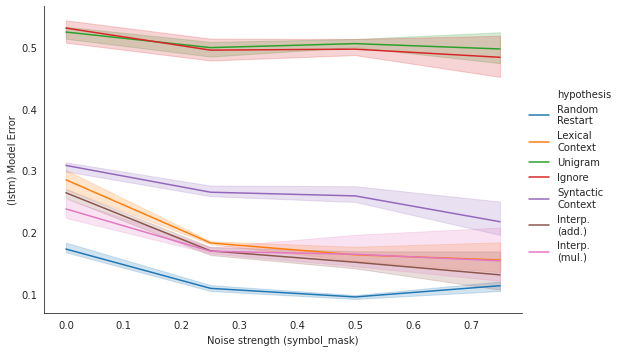

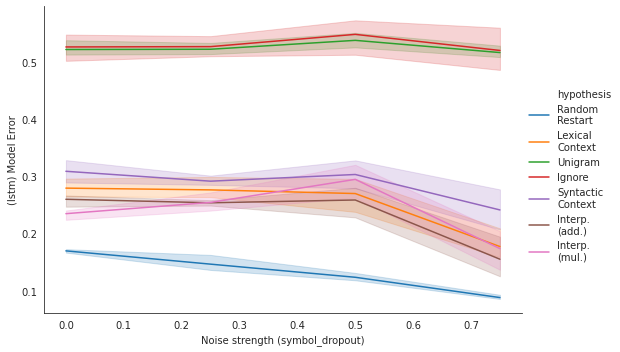

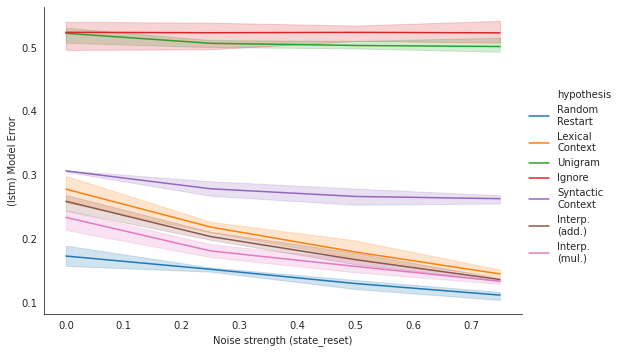

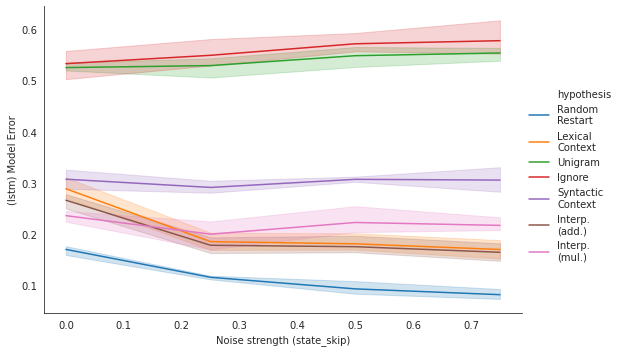

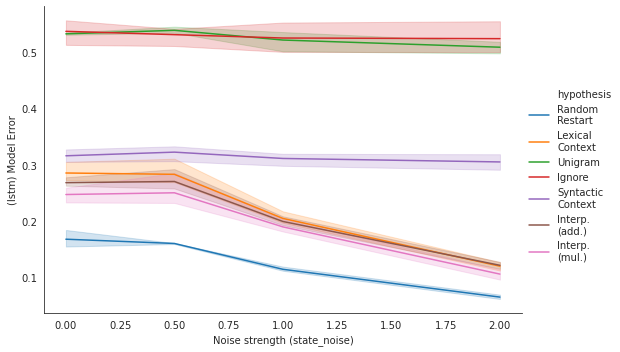

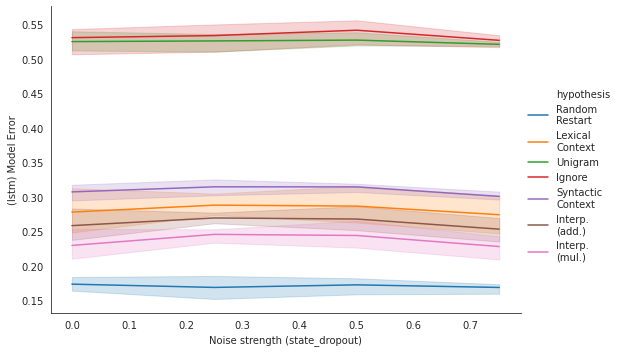

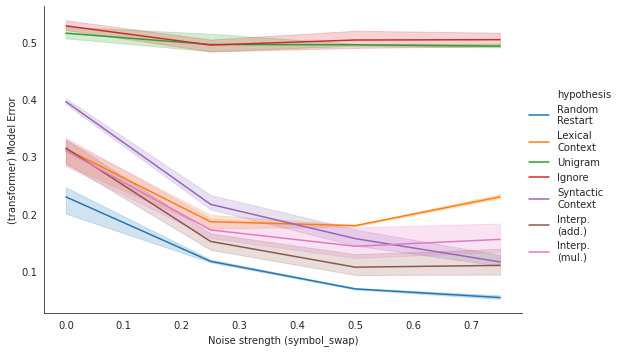

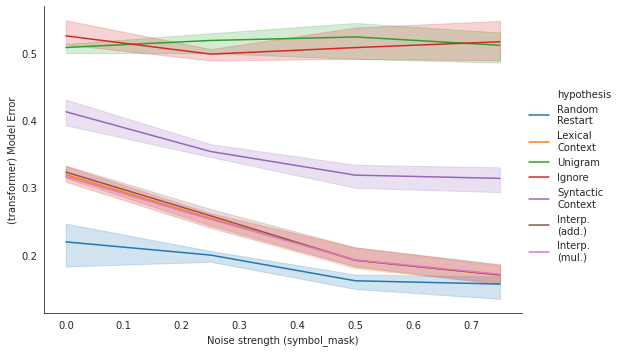

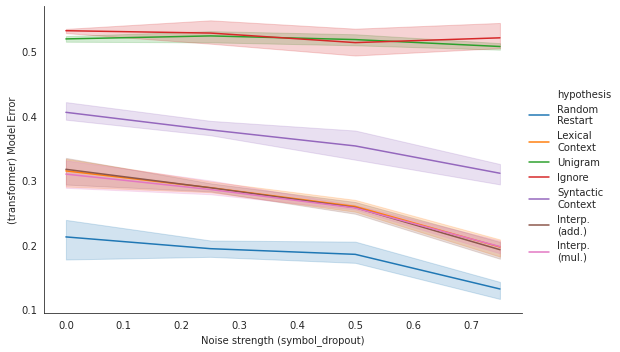

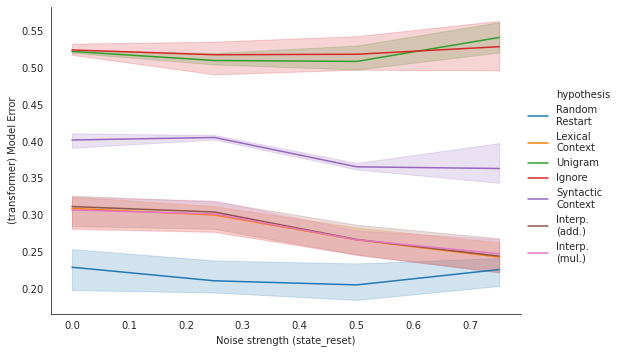

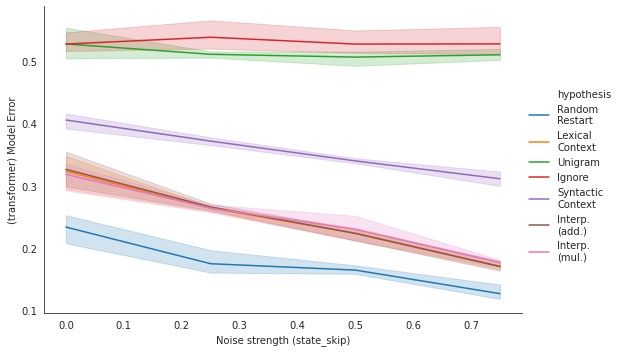

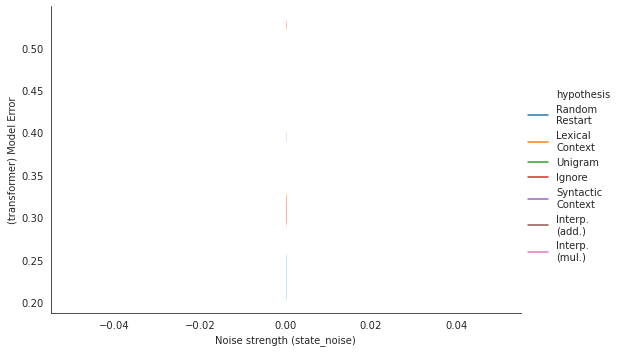

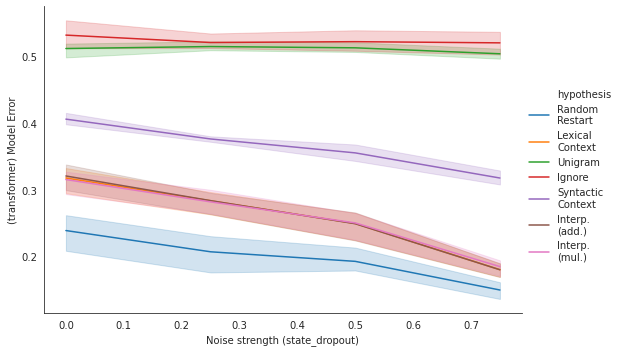

In [8]:
for model, data in [("lstm", lstm_data), ("transformer", transformer_data)]:
    for result_group in data:
        clean = []
        noise_type, = (n for n in noises if n in result_group[0])
        for result in result_group:
            if result["hypothesis"] == "gt":
                continue
            clean.append(fix_hyp_names(result))
        df = pd.DataFrame(clean)
        #display(df)
        #display(df)
        sns.relplot(
            data=df,
            x=noise_type,
            y="extrap_acc",
            hue="hypothesis",
            aspect=1.5,
            kind="line",
        )

        plt.xlabel(f"Noise strength ({noise_type})")
        plt.ylabel(f"({model}) Model Error")
        plt.savefig(f"{model}_{noise_type}.pdf")